In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from hmmlearn import hmm


In [2]:

# Hidden Markov Model Modifiable Parameters
hidden_states = 2;
em_iterations = 75;
num_models = 8;

In [3]:
df = pd.read_csv('SPY.csv')

In [4]:
# Volatility is computed by obtaining variance between current close and prices of past 10 days
Volatility = []

# MA is the 10 day SMA
MA = []

# Return is the single-day percentage return
Return = []
ma_sum = 0;

# Warming up data for moving average and volatility calculations
for i in range (0, 10):
    Volatility.append(0);
    MA.append(0);
    Return.append(0);
    ma_sum += df['Close'][i];

# Filling in data for return, moving average, and volatility
for ind in df.index: 
    if ind >= 10:
        tail_close = df['Close'][ind-10];
        prev_close = df['Close'][ind-1];
        head_close = df['Close'][ind];
        ma_sum = (ma_sum - tail_close + head_close);
        ma_curr = ma_sum/10;
        MA.append(ma_curr);
        Return.append(((head_close-prev_close)/prev_close)*100);
        #Computing Volatility
        vol_sum = 0;
        for i in range (0,10):
            curr_vol = abs(ma_curr - df['Close'][ind-i]);
            vol_sum += (curr_vol ** 2);
        Volatility.append(vol_sum/10);

In [5]:
# Adding columns to dataframe
df['Volatility'] = Volatility;
df['MA'] = MA; #moving average
df['Return'] = Return;

In [6]:
df.shape
df.index


RangeIndex(start=0, stop=6841, step=1)

In [7]:
# Dataframe readjustment
total_length = 6841
#drop_length = 3500
training_length = 5473 #80% of total_length

# total = test + drop + training
test_length = total_length - training_length

#test_length = total_length - drop_length - training_length
#Test = 635
data_length = training_length+test_length
#df = df.drop(range(0, drop_length));
df.index = range(0, data_length);

In [8]:
df.index
#df => training + test 

RangeIndex(start=0, stop=6841, step=1)

In [9]:
# Creating testing and training dataset
# 2000 datapoints in training, 838 datapoints in test
test = pd.DataFrame(df, index = range(training_length, data_length))
test.index = range(0,test_length)
training = df.drop(range(training_length, data_length))

In [18]:
training.shape, test.shape


((5473, 10), (1368, 10))

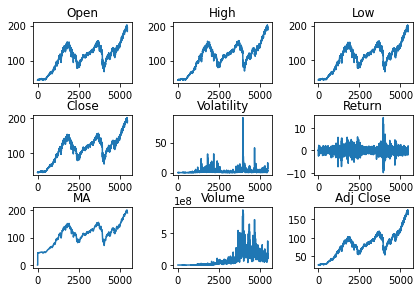

In [10]:
fig, a =  plt.subplots(3,3)
x = np.arange(1,5)
fig.tight_layout()
a[0][0].plot(range(0,training_length), training.iloc[:,1])
a[0][0].set_title('Open')
a[0][1].plot(range(0,training_length), training.iloc[:,2])
a[0][1].set_title('High')
a[0][2].plot(range(0,training_length), training.iloc[:,3])
a[0][2].set_title('Low')
a[1][0].plot(range(0,training_length), training.iloc[:,4])
a[1][0].set_title('Close')
a[1][1].plot(range(0,training_length), training.iloc[:,7])
a[1][1].set_title('Volatility')
a[1][2].plot(range(0,training_length), training.iloc[:,9])
a[1][2].set_title('Return')
a[2][0].plot(range(0,training_length), training.iloc[:,8])
a[2][0].set_title('MA')
a[2][1].plot(range(0,training_length), training.iloc[:,6])
a[2][1].set_title('Volume')
a[2][2].plot(range(0,training_length), training.iloc[:,5])
a[2][2].set_title('Adj Close')
plt.show()

In [11]:
test

Date        Open        High         Low       Close   Adj Close  \
0     10/23/2014  194.619995  196.199997  194.259995  194.929993  170.783539   
1     10/24/2014  195.250000  196.490005  194.490005  196.429993  172.097763   
2     10/27/2014  195.729996  196.449997  195.029999  196.160004  171.861160   
3     10/28/2014  196.820007  198.419998  196.729996  198.410004  173.832474   
4     10/29/2014  198.550003  199.119995  196.800003  198.110001  173.569626   
...          ...         ...         ...         ...         ...         ...   
1363   3/25/2020  244.869995  256.350006  239.750000  246.789993  241.329590   
1364   3/26/2020  249.520004  262.799988  249.050003  261.200012  255.420761   
1365   3/27/2020  253.270004  260.809998  251.050003  253.419998  247.812897   
1366   3/30/2020  255.699997  262.429993  253.529999  261.649994  255.860779   
1367   3/31/2020  260.559998  263.329987  256.220001  257.750000  252.047119   

         Volume  Volatility          MA    Return  
0     154944000    8.934269  189.881000  1.162484  
1     117927000   12.832852  190.470000  0.769507  
2      82954000   14.368485  191.345000 -0.137448  
3     106736000   16.884266  192.416000  1.147023  
4     142557000   15.178976  193.584001 -0.151204  
...         ...         ...         ...       ...  
1363  299430300  145.752677  243.228000  1.497018  
1364  257632800  173.955121  244.537001  5.838980  
1365  224341200  117.898043  242.947000 -2.978566  
1366  171369500  147.166709  245.126999  3.247572  
1367  194881100  156.968201  245.621999 -1.490539  

[1368 rows x 10 columns]

In [25]:
# Creating the Hidden Markov Model
model = hmm.GaussianHMM(n_components = hidden_states, covariance_type="full", n_iter = em_iterations);
vol = training.iloc[:,7];
ret = training.iloc[:,9];
obs = [];
for i in range(0, len(vol)):
    arr = [];
    arr.append(vol[i]);
    arr.append(ret[i]);
    obs.append(arr);

# Fitting the model and obtaining predictions
model.fit(obs)
predictions = model.predict(obs)

In [34]:
model

GaussianHMM(covariance_type='full', n_components=2, n_iter=75)

In [33]:
import sys
np.set_printoptions(threshold=sys.maxsize)
predictions
len(predictions)

#training_length = 5473

5473

In [35]:
training['predictions'] = predictions
import sys
np.set_printoptions(threshold=sys.maxsize)
training.iloc[3600:4000,:]

pd.set_option("display.max_rows", None, "display.max_columns", None)
training

sum(training.loc[:,'predictions'] == training.loc[:,'predictions'].shift(1))
5473-5277

196

Date        Open        High         Low       Close   Adj Close  \
0       2/1/1993   43.968750   44.250000   43.968750   44.250000   25.900297   
1       2/2/1993   44.218750   44.375000   44.125000   44.343750   25.955160   
2       2/3/1993   44.406250   44.843750   44.375000   44.812500   26.229534   
3       2/4/1993   44.968750   45.093750   44.468750   45.000000   26.339272   
4       2/5/1993   44.968750   45.062500   44.718750   44.968750   26.320992   
5       2/8/1993   44.968750   45.125000   44.906250   44.968750   26.320992   
6       2/9/1993   44.812500   44.812500   44.562500   44.656250   26.138079   
7      2/10/1993   44.656250   44.750000   44.531250   44.718750   26.174665   
8      2/11/1993   44.781250   45.125000   44.781250   44.937500   26.302710   
9      2/12/1993   44.875000   44.875000   44.593750   44.593750   26.101501   
10     2/16/1993   44.468750   44.468750   43.406250   43.468750   25.443016   
11     2/17/1993   43.468750   43.531250   43.281250   43.437500   25.424713   
12     2/18/1993   43.937500   43.937500   42.812500   43.406250   25.406427   
13     2/19/1993   43.406250   43.562500   43.343750   43.562500   25.497894   
14     2/22/1993   43.687500   43.781250   43.562500   43.718750   25.589336   
15     2/23/1993   43.843750   43.875000   43.468750   43.687500   25.571062   
16     2/24/1993   43.718750   44.250000   43.718750   44.250000   25.900297   
17     2/25/1993   44.218750   44.375000   44.125000   44.343750   25.955160   
18     2/26/1993   44.437500   44.437500   44.187500   44.406250   25.991751   
19      3/1/1993   44.562500   44.562500   44.218750   44.281250   25.918585   
20      3/2/1993   44.312500   44.937500   44.250000   44.937500   26.302710   
21      3/3/1993   45.000000   45.156250   44.937500   45.125000   26.412449   
22      3/4/1993   45.187500   45.187500   44.875000   44.875000   26.266106   
23      3/5/1993   44.937500   45.125000   44.718750   44.750000   26.192942   
24      3/8/1993   44.843750   45.750000   44.843750   45.750000   26.778265   
25      3/9/1993   45.656250   45.687500   45.500000   45.593750   26.686821   
26     3/10/1993   45.593750   45.687500   45.406250   45.687500   26.741693   
27     3/11/1993   45.718750   45.843750   45.500000   45.562500   26.668530   
28     3/12/1993   45.187500   45.218750   44.812500   45.093750   26.394157   
29     3/15/1993   45.062500   45.312500   45.062500   45.312500   26.522215   
30     3/16/1993   45.312500   45.437500   45.312500   45.312500   26.522215   
31     3/17/1993   45.250000   45.250000   44.968750   45.031250   26.357567   
32     3/18/1993   45.218750   45.500000   45.218750   45.312500   26.522215   
33     3/19/1993   45.281250   45.281250   45.031250   45.031250   26.482059   
34     3/22/1993   44.593750   44.875000   44.562500   44.781250   26.335051   
35     3/23/1993   44.906250   44.937500   44.812500   44.875000   26.390169   
36     3/24/1993   44.812500   45.062500   44.593750   44.875000   26.390169   
37     3/25/1993   44.906250   45.250000   44.843750   45.156250   26.555563   
38     3/26/1993   45.125000   45.156250   44.875000   44.906250   26.408546   
39     3/29/1993   44.937500   45.312500   44.937500   45.093750   26.518806   
40     3/30/1993   45.156250   45.218750   45.093750   45.218750   26.592316   
41     3/31/1993   45.343750   45.468750   45.187500   45.187500   26.573952   
42      4/1/1993   45.250000   45.250000   44.937500   45.031250   26.482059   
43      4/2/1993   44.656250   44.656250   44.093750   44.093750   25.930733   
44      4/5/1993   44.437500   44.437500   44.187500   44.312500   26.059359   
45      4/6/1993   44.406250   44.406250   44.062500   44.187500   25.985861   
46      4/7/1993   44.250000   44.343750   44.156250   44.343750   26.077761   
47      4/8/1993   44.531250   44.531250   44.093750   44.281250   26.040989   
48     4/12/1993   44.718750   44.937500   44.656250   44.906250   26.408546   
49     4/13/

In [122]:
training['Date'] = pd.to_datetime(training['Date'])
training

Date        Open        High         Low       Close   Adj Close  \
0    1993-02-01   43.968750   44.250000   43.968750   44.250000   25.900297   
1    1993-02-02   44.218750   44.375000   44.125000   44.343750   25.955160   
2    1993-02-03   44.406250   44.843750   44.375000   44.812500   26.229534   
3    1993-02-04   44.968750   45.093750   44.468750   45.000000   26.339272   
4    1993-02-05   44.968750   45.062500   44.718750   44.968750   26.320992   
5    1993-02-08   44.968750   45.125000   44.906250   44.968750   26.320992   
6    1993-02-09   44.812500   44.812500   44.562500   44.656250   26.138079   
7    1993-02-10   44.656250   44.750000   44.531250   44.718750   26.174665   
8    1993-02-11   44.781250   45.125000   44.781250   44.937500   26.302710   
9    1993-02-12   44.875000   44.875000   44.593750   44.593750   26.101501   
10   1993-02-16   44.468750   44.468750   43.406250   43.468750   25.443016   
11   1993-02-17   43.468750   43.531250   43.281250   43.437500   25.424713   
12   1993-02-18   43.937500   43.937500   42.812500   43.406250   25.406427   
13   1993-02-19   43.406250   43.562500   43.343750   43.562500   25.497894   
14   1993-02-22   43.687500   43.781250   43.562500   43.718750   25.589336   
15   1993-02-23   43.843750   43.875000   43.468750   43.687500   25.571062   
16   1993-02-24   43.718750   44.250000   43.718750   44.250000   25.900297   
17   1993-02-25   44.218750   44.375000   44.125000   44.343750   25.955160   
18   1993-02-26   44.437500   44.437500   44.187500   44.406250   25.991751   
19   1993-03-01   44.562500   44.562500   44.218750   44.281250   25.918585   
20   1993-03-02   44.312500   44.937500   44.250000   44.937500   26.302710   
21   1993-03-03   45.000000   45.156250   44.937500   45.125000   26.412449   
22   1993-03-04   45.187500   45.187500   44.875000   44.875000   26.266106   
23   1993-03-05   44.937500   45.125000   44.718750   44.750000   26.192942   
24   1993-03-08   44.843750   45.750000   44.843750   45.750000   26.778265   
25   1993-03-09   45.656250   45.687500   45.500000   45.593750   26.686821   
26   1993-03-10   45.593750   45.687500   45.406250   45.687500   26.741693   
27   1993-03-11   45.718750   45.843750   45.500000   45.562500   26.668530   
28   1993-03-12   45.187500   45.218750   44.812500   45.093750   26.394157   
29   1993-03-15   45.062500   45.312500   45.062500   45.312500   26.522215   
30   1993-03-16   45.312500   45.437500   45.312500   45.312500   26.522215   
31   1993-03-17   45.250000   45.250000   44.968750   45.031250   26.357567   
32   1993-03-18   45.218750   45.500000   45.218750   45.312500   26.522215   
33   1993-03-19   45.281250   45.281250   45.031250   45.031250   26.482059   
34   1993-03-22   44.593750   44.875000   44.562500   44.781250   26.335051   
35   1993-03-23   44.906250   44.937500   44.812500   44.875000   26.390169   
36   1993-03-24   44.812500   45.062500   44.593750   44.875000   26.390169   
37   1993-03-25   44.906250   45.250000   44.843750   45.156250   26.555563   
38   1993-03-26   45.125000   45.156250   44.875000   44.906250   26.408546   
39   1993-03-29   44.937500   45.312500   44.937500   45.093750   26.518806   
40   1993-03-30   45.156250   45.218750   45.093750   45.218750   26.592316   
41   1993-03-31   45.343750   45.468750   45.187500   45.187500   26.573952   
42   1993-04-01   45.250000   45.250000   44.937500   45.031250   26.482059   
43   1993-04-02   44.656250   44.656250   44.093750   44.093750   25.930733   
44   1993-04-05   44.437500   44.437500   44.187500   44.312500   26.059359   
45   1993-04-06   44.406250   44.406250   44.062500   44.187500   25.985861   
46   1993-04-07   44.250000   44.343750   44.156250   44.343750   26.077761   
47   1993-04-08   44.531250   44.531250   44.093750   44.281250   26.040989   
48   1993-04-12   44.718750   44.937500   44.656250   44.906250   26.408546   
49   1993-04-13   44.875000   45.156250   44.843750   45.0000

In [135]:
start_date_2000 = '2000-01-03'
end_date_2007 = '2006-12-31'

after_start_date_2000 = training['Date'] >= start_date_2000
before_end_date_2007 = training['Date'] <= end_date_2007

filter_dates_1 = training.loc[after_start_date_2000 & before_end_date_2007]
filter_dates_1.shape

(1759, 11)

60

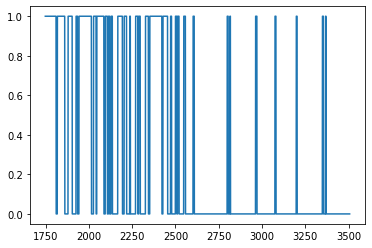

In [136]:
plt.plot(filter_dates_1['predictions'])
sum(filter_dates_1.loc[:,'predictions'] == filter_dates_1.loc[:,'predictions'].shift(1))
#Number of Shifts during 2000 to 2007
filter_dates_1.shape[0] - sum(filter_dates_1.loc[:,'predictions'] == filter_dates_1.loc[:,'predictions'].shift(1))



In [137]:
start_date_2007 = '2007-01-03'
end_date_2009 = '2009-12-31'
after_start_date_2007 = training['Date'] >= start_date_2007
before_end_date_2009 = training['Date'] <= end_date_2009

filter_dates_2 = training.loc[after_start_date_2007 & before_end_date_2009]
filter_dates_2.shape

(756, 11)

37

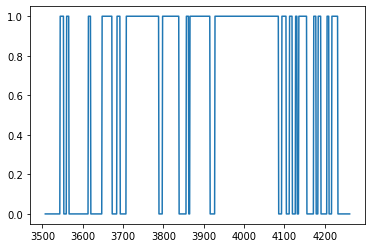

In [138]:
plt.plot(filter_dates_2['predictions'])
sum(filter_dates_2.loc[:,'predictions'] == filter_dates_2.loc[:,'predictions'].shift(1))
#Number of Shifts during 2000 to 2007
filter_dates_2.shape[0] - sum(filter_dates_2.loc[:,'predictions'] == filter_dates_2.loc[:,'predictions'].shift(1))



In [139]:
start_date_2010 = '2010-01-04'
end_date_2014 = '2014-10-22'

after_start_date_2010 = training['Date'] >= start_date_2010
before_end_date_2014 = training['Date'] <= end_date_2014

filter_dates_3 = training.loc[after_start_date_2010 & before_end_date_2014]
filter_dates_3.shape

(1210, 11)

64

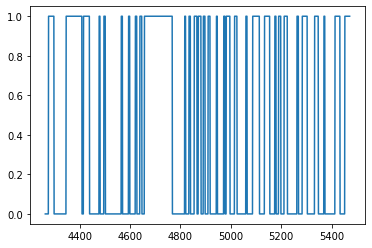

In [140]:
plt.plot(filter_dates_3['predictions'])
sum(filter_dates_3.loc[:,'predictions'] == filter_dates_3.loc[:,'predictions'].shift(1))
#Number of Shifts during 2010 to 2014
filter_dates_3.shape[0] - sum(filter_dates_3.loc[:,'predictions'] == filter_dates_3.loc[:,'predictions'].shift(1))


In [75]:
# Regime Classification
regime_vol = [];
regime_ret = [];
regime_count = [];
return_map = {};

for i in range(0, hidden_states):
    regime_vol.append(0);
    regime_ret.append(0);
    regime_count.append(0);

for i in range(0, len(predictions)):
    regime_count[predictions[i]] += 1;
    regime_vol[predictions[i]] += training.iloc[i, 7];
    regime_ret[predictions[i]] += training.iloc[i, 9];
    
    if not predictions[i] in return_map:
        return_map[predictions[i]] = [];
    return_map[predictions[i]].append(training.iloc[i,9]);
    
for i in range(0, hidden_states):
    regime_vol[i] = regime_vol[i] / regime_count[i];
    regime_ret[i] = regime_ret[i] / regime_count[i];

In [76]:

max_occurrence = np.argmax(regime_count)
for i in range(0, hidden_states):
    print("Regime {0}".format(i))
    print("Avg Vol: {0}".format(regime_vol[i]));
    print("Avg Return: {0}".format(regime_ret[i]));
    print("Occurrence: {0}\n".format(regime_count[i]));

Regime 0
Avg Vol: 0.8090876510545043
Avg Return: 0.04333054730831049
Occurrence: 3596

Regime 1
Avg Vol: 5.66558519476158
Avg Return: 0.016091218490033424
Occurrence: 1877



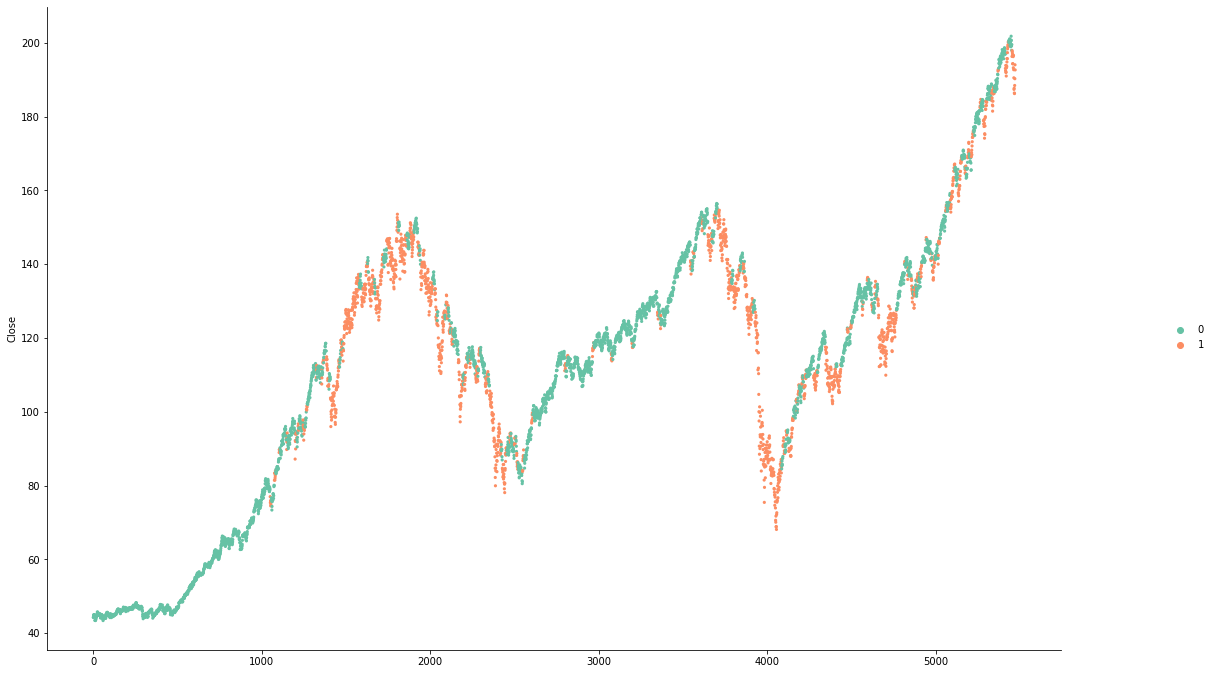

In [77]:

plot = sns.relplot(x=range(0,training_length), y="Close", data=training, hue=predictions, 
            linewidth = 0, palette="Set2", s = 10);
plot.fig.set_size_inches(18,10)

In [ ]:
returns = pd.DataFrame(data = return_map[max_occurrence])
for i in range(0, hidden_states):
    if(i is not max_occurrence):
        returns[i] = pd.Series(return_map[i]);

#sns.pairplot(data = returns, height=3);

In [ ]:
distribution = model.get_stationary_distribution();
for i in range(0, hidden_states):
    print("Regime {0}: {1}".format(i, distribution[i]));

In [ ]:
print("Model Score: {0}".format(model.score(obs)));


In [ ]:
# Boxplot of returns
fig, ax = plt.subplots()
ax.set(ylim=(-15, 15))
ax.set_title("Boxplot of Returns")
ax.boxplot(return_map.values(), notch=True, vert = True, autorange = True)
ax.set_xticklabels(return_map.keys())